# Mean and Median Filter Application Without any Library
# by Ismail Avcu 

## Important Note: This code below was for homework purpose. There might be way more optimized algorithms.

## 1- Read pgm File Functions

In [1]:
def read_pgm(image):  # for P5 files
    #Return a raster of integers from a PGM P5 as a list of lists.
    
    pgmf = open(image, 'rb')
    
    pgmf.readline()
    (width, height) = [int(float(i)) for i in pgmf.readline().split()]
    depth = int(pgmf.readline())

    raster = []
    for y in range(height):
        row = []
        for y in range(width):
            row.append(ord(pgmf.read(1)))
        raster.append(row)
    return raster

In [2]:
def read_pgm_p2(image):   # extracts the image section of the P2 file
    # this is for P2 files
    
    pgmf = open(image, "r")
    
    pgmf.readline()
    
    (width, height) = [int(i) for i in pgmf.readline().split()]
    pgmf.readline()
    l = []
    raster = [ [0]*width for i in range(height)]
    
    l = [line.split() for line in pgmf]
    flattened = [val for sublist in l for val in sublist]
    
    x = 0
    
    for i in range(height):
        for j in range(width):
            raster[i][j] = int(flattened[x])
            x = x + 1

    return raster

## 2- Filter Functions

In [3]:
def apply_median_filter(image, median_filter_size):
    nrow = len(image)
    ncol = len(image[0])
        
    result_image = [[ 0 for i in range(ncol)] for j in range(nrow)]  #initialize zero matrix
    image_cpy = [row[:] for row in image] # copied the original image to different matrix
        
    for k in range(median_filter_size//2): #take the frame of the original image and takit it to the processed image (no padding). if median size = 5, this code must run the 2 times.
        for i in range(nrow):  
            result_image[i][0+k] = image_cpy[i][0+k]   # first columns remain same
            result_image[i][ncol-1-k] = image_cpy[i][ncol-1-k]  # last rows remain same

        for j in range(ncol):
            result_image[0+k][j] = image_cpy[0+k][j]   # first rows remain same
            result_image[nrow-1-k][j] = image_cpy[nrow-1-k][j]   # last cols remain same
        
    # median filter starts from here
        
    median_filter_array = [0]
        
    half_size = median_filter_size//2

        
    for i in range(half_size, nrow-half_size):
        for j in range(half_size, ncol-half_size): #filter center
                
            for a in range(-half_size, half_size +1):
                for b in range(-half_size, half_size +1):
                        
                    median_filter_array.append(image_cpy[i+a][j+b])  
                
            median_filter_array.sort()
                
            result_image[i][j] = median_filter_array[len(median_filter_array)//2]
                
            for m in range(median_filter_size**2):   # clear current values of the filter
                median_filter_array.pop()
                
        
    return result_image
        
        

In [4]:
def apply_mean_filter(image, mean_filter_size):
    nrow = len(image)
    ncol = len(image[0])
        
    result_image = [[ 0 for i in range(ncol)] for j in range(nrow)]  #initialize zero matrix
    image_cpy = [row[:] for row in image] # copied the original image to different matrix
        
    for k in range(mean_filter_size//2): #take the frame of the original image and takit it to the processed image (no padding). if median size = 5, this code must run the 2 times.
        for i in range(nrow):  
            result_image[i][0+k] = image_cpy[i][0+k]   # first columns remain same
            result_image[i][ncol-1-k] = image_cpy[i][ncol-1-k]  # last rows remain same

        for j in range(ncol):
            result_image[0+k][j] = image_cpy[0+k][j]   # first rows remain same
            result_image[nrow-1-k][j] = image_cpy[nrow-1-k][j]   # last cols remain same
        
    # median filter starts here
        
    mean_filter_array = [0]
        
    half_size = mean_filter_size//2

        
    for i in range(half_size, nrow-half_size):
        for j in range(half_size, ncol-half_size): #filter center
                
            for a in range(-half_size, half_size +1):
                for b in range(-half_size, half_size +1):
                        
                    mean_filter_array.append(image_cpy[i+a][j+b])  
                        
            result_image[i][j] = round(sum(mean_filter_array)/(mean_filter_size**2))
                
            for m in range(mean_filter_size**2):   # clear current values of the filter
                mean_filter_array.pop()
        
                
    return result_image
        
        

## 3- Demonstration for LenaN.pgm

In [5]:
image = read_pgm('lenaN.pgm')
lena_mean_filtered_3x3 = apply_mean_filter(image, 3)
lena_mean_filtered_7x7 = apply_mean_filter(image, 7)
lena_median_filtered_7x7 = apply_median_filter(image, 7)

### for Plotting the images

Text(0.5, 1.0, 'lena_median_filtered_7x7')

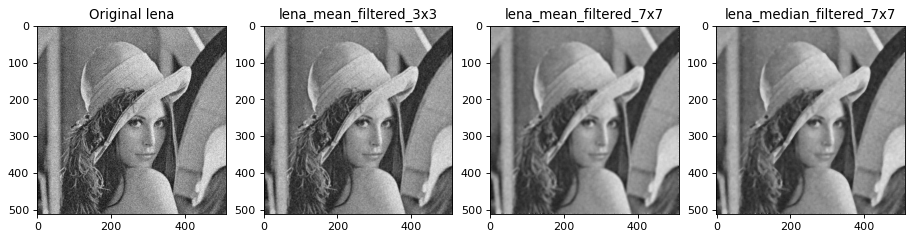

In [18]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(14, 12), dpi=80)

plt.subplot(1, 4, 1)
plt.imshow(image, cmap="gray")
plt.title("Original lena")

plt.subplot(1, 4, 2)
plt.imshow(lena_mean_filtered_3x3, cmap="gray")
plt.title("lena_mean_filtered_3x3")

plt.subplot(1, 4, 3)
plt.imshow(lena_mean_filtered_7x7, cmap="gray")
plt.title("lena_mean_filtered_7x7")

plt.subplot(1, 4, 4)
plt.imshow(lena_median_filtered_7x7, cmap="gray")
plt.title("lena_median_filtered_7x7")